In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv(r'nyc-rolling-sales.csv')

In [4]:
df = df.apply(label_encoder.fit_transform)

In [5]:
df2 = df.drop_duplicates()
df2.replace(' -  ', 0,  inplace=True)
df2.replace(np.nan,0, inplace=True)

In [6]:
Y=df2['SALE PRICE'].values
df2.drop(['SALE PRICE'],axis=1)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE
0,0,0,1,6,6,360,5,0,16,14889,...,8,5,0,5,1069,4844,40,1,15,320
1,1,0,1,6,5,367,25,0,21,28592,...,8,28,3,31,4119,1411,40,1,20,104
2,2,0,1,6,5,367,38,0,21,22192,...,8,16,1,17,1850,5187,40,1,20,99
3,3,0,1,6,7,370,20,0,18,15090,...,8,10,0,10,1919,4950,53,1,17,22
4,4,0,1,6,6,372,54,0,16,35431,...,8,6,0,6,2038,4082,40,1,15,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8405,4,251,1,1,6877,33,0,13,41385,...,56,2,0,2,2076,2306,138,0,12,88
84544,8406,4,251,1,1,6877,77,0,13,37214,...,56,2,0,2,2197,2076,138,0,12,231
84545,8407,4,251,1,1,6879,59,0,11,48075,...,56,2,0,2,3658,864,65,0,10,306
84546,8408,4,251,20,10,6668,27,0,84,33114,...,56,0,7,7,1683,4838,141,3,83,111


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Unnamed: 0                      84548 non-null  int64
 1   BOROUGH                         84548 non-null  int64
 2   NEIGHBORHOOD                    84548 non-null  int32
 3   BUILDING CLASS CATEGORY         84548 non-null  int32
 4   TAX CLASS AT PRESENT            84548 non-null  int32
 5   BLOCK                           84548 non-null  int64
 6   LOT                             84548 non-null  int64
 7   EASE-MENT                       84548 non-null  int32
 8   BUILDING CLASS AT PRESENT       84548 non-null  int32
 9   ADDRESS                         84548 non-null  int32
 10  APARTMENT NUMBER                84548 non-null  int32
 11  ZIP CODE                        84548 non-null  int64
 12  RESIDENTIAL UNITS               84548 non-null  int64
 13  C

In [8]:
X=df2.values

In [9]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.5, shuffle=True)

In [11]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(22,)),
        Dense(1, activation='ReLU', name = 'layer1')
     ]
)

In [12]:
W1, b1 = model.get_layer("layer1").get_weights()

In [30]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
)

In [31]:
model.fit(
    x_train,y_train,            
    epochs=30,
)

Epoch 1/30
1322/1322 [==============================] - 2s 954us/step - loss: 21845526.0000
Epoch 2/30
1322/1322 [==============================] - 1s 931us/step - loss: 9366397.0000
Epoch 3/30
1322/1322 [==============================] - 1s 905us/step - loss: 2106502.7500
Epoch 4/30
1322/1322 [==============================] - 1s 1ms/step - loss: 932857.7500
Epoch 5/30
1322/1322 [==============================] - 1s 955us/step - loss: 413232.4062
Epoch 6/30
1322/1322 [==============================] - 1s 871us/step - loss: 161346.4688
Epoch 7/30
1322/1322 [==============================] - 1s 923us/step - loss: 59002.1797
Epoch 8/30
1322/1322 [==============================] - 1s 990us/step - loss: 21255.3398
Epoch 9/30
1322/1322 [==============================] - 1s 896us/step - loss: 6520.0244
Epoch 10/30
1322/1322 [==============================] - 1s 953us/step - loss: 1815.9569
Epoch 11/30
1322/1322 [==============================] - 1s 849us/step - loss: 855.7897
Epoch 12/30
132

In [32]:
W1, b1 = model.get_layer("layer1").get_weights()
model.get_layer("layer1").set_weights([W1,b1])

In [33]:
y_pred=model.predict(x_test)

1322/1322 [==============================] - 1s 776us/step


In [34]:
print(y_pred[1])
print(y_test[1])

[5398.0835]
5398


MAE: 0.1721021534739591
MSE: 0.07138579568030215
RMSE: 0.2671812038304756
VarScore: 0.9999999940458236


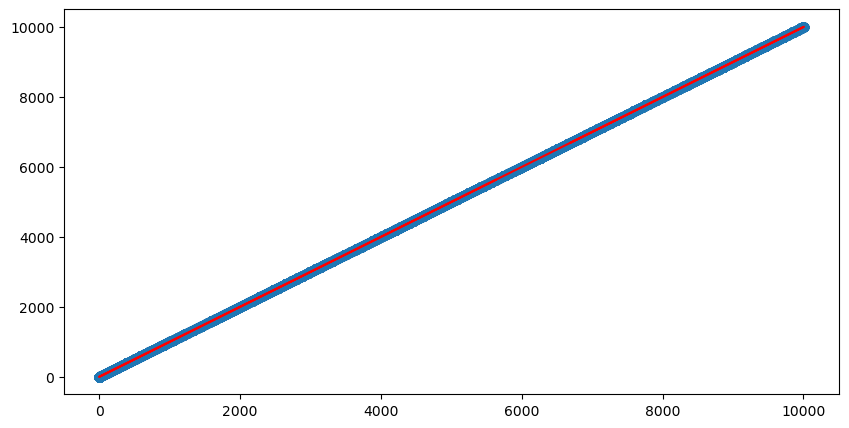

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')